In [1]:
##JJA_FinalProject_Model.ipynb
#this is the model use for the creation of car detection using standfords car data set
#use of tensorflow to create a CNN

##TODO: decide of testing extraction and images are of any use if not remove commited out code that supports this. -AH

#file created by: Alex Hom 4/14/2020
#updated by: Alex Hom 4/25/2020 - added test values back
#            Alex Hom 5/1/2020 - Modify input image size and resizing added methods of pridiction of individual values
#            Alex Hom/Julian Geske 5/6/2020 - Added Transformation code 
#            Alex Hom 5/8/2020 - Added Translation of key to string for car model/make
#            Alex Hom 5/9/2020 - Modifyed model layers to try to get a better accracy of the model (currently only showing 1 value)
#            Alex Hom 5/10/2020 - modifyed model to correctly show all 196 classes and fix the Y_input of the model data
#            Alex Hom 5/12/2020 - notebook lock, finsih last model training and saved model file for use

#import universal libs
import os
import io
import pandas as pd
import numpy as np
import cv2

In [2]:
##EXTRACTOR (NOT COMPLEATE DON'T USE) - AH
##(will update this later for download and extraction of files to correct folder where this notebook exsist - AH)
import tarfile

#Train_Path = os.path.join(filepath, "/cars_train.tar")

#Train_data_Tar = tarfile.open("cars_train.tar" ,"r")

#for memebers in Train_data_Tar.getmembers():
#    Train_data_byte  = Train_data_Tar.extractfile(memebers)
#    if Train_data_byte is not None:
#            Train_data_raw = Train_data_byte.read()
#            Train_data = Image.open(Train_data_raw)
#    #Train_data_byte = Train_data_byte.read()
#    #Train_data = Image.open(Train_data_raw)
#Train_data = 0

#for names in Train_data_Tar.getnames():
#    Train_data_byte  = Train_data_Tar.extract("cars_train",names)
#    if Train_data_byte is not None:
#            print("Image found")
#            Train_data_raw = Train_data_byte.read()
#            Train_data = Image.open(Train_data_raw)
#Train_data_Tar.close()
#print(Train_data)
#Test_data_Tar = tarfile.open("cars_test.tar" ,"r")    
#for memebers in Test_data_Tar.getmembers():
#    Test_data = Test_data_Tar.extractfile(memebers).read()
#    Test_buffer = np.frombuffer(Test_data, dtype=np.uint8)
#    Test_data_decoded = cv2.imdecode(Test_buffer, cv2.IMREAD_COLOR)

#Train_data_decoded
    

C:\Users\Tokki\JJA_Model_FinalProject
C:\Users\Tokki\JJA_Model_FinalProject\FinalProject_Training_data
['00001.jpg', '00002.jpg', '00003.jpg', '00004.jpg', '00005.jpg', '00006.jpg', '00007.jpg', '00008.jpg', '00009.jpg', '00010.jpg']
['00001.jpg', '00002.jpg', '00003.jpg', '00004.jpg', '00005.jpg', '00006.jpg', '00007.jpg', '00008.jpg', '00009.jpg', '00010.jpg']


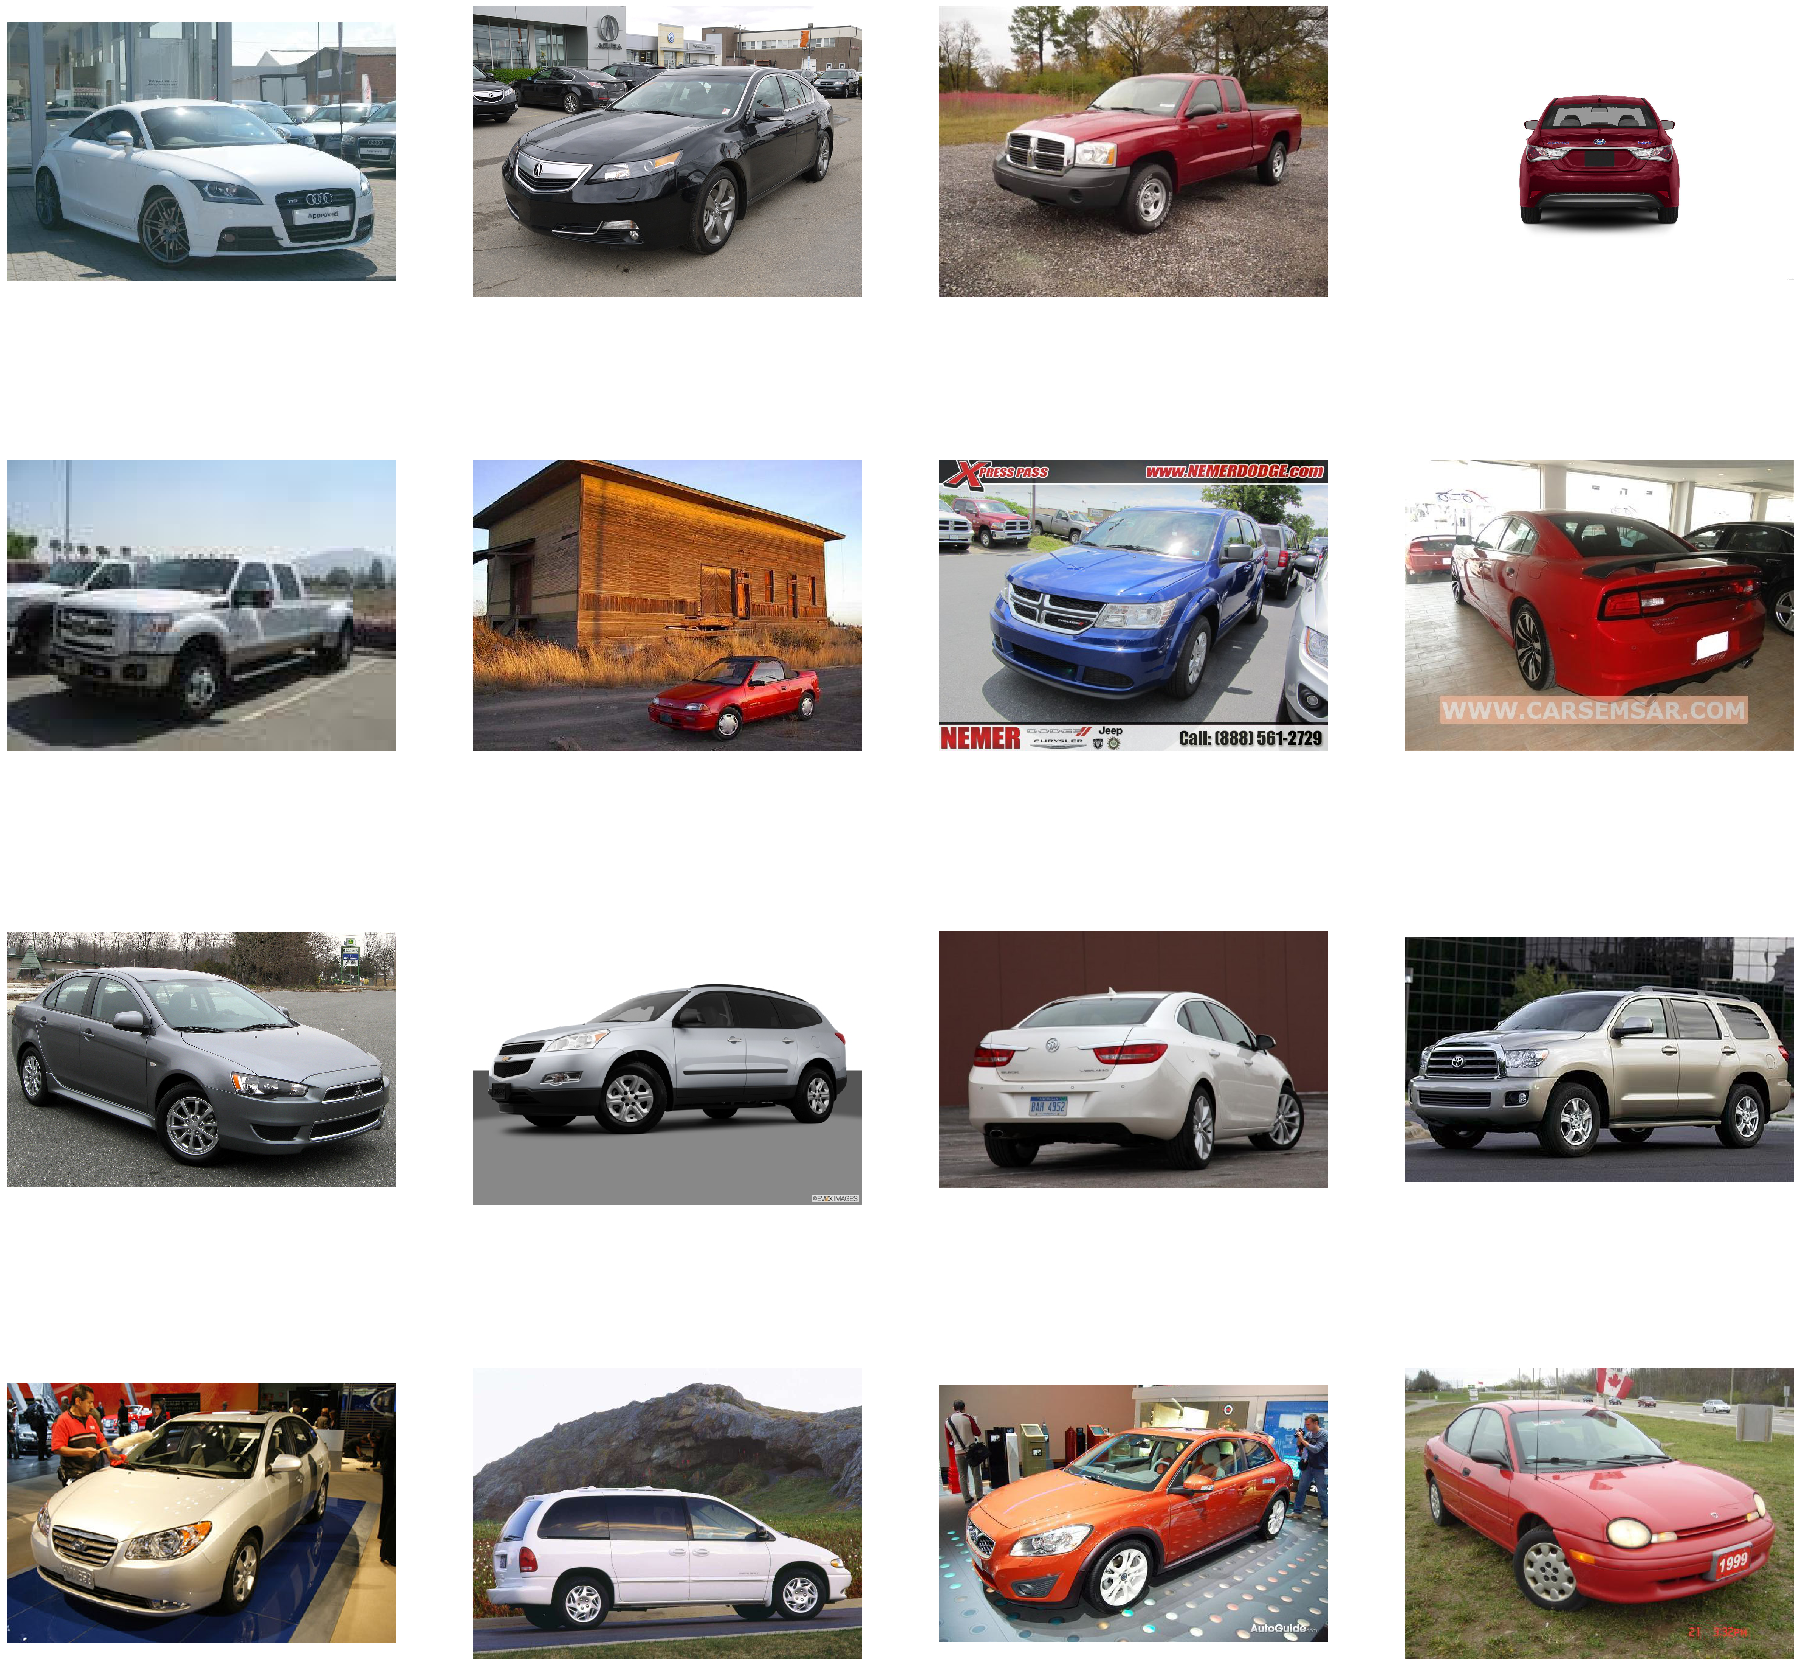

In [3]:
##DATA PATH SETUP & IMAGE CHECK##
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

#setup dir file path
#filepath = os.path.join("C:","\\Users\\Tokki\\JJA_Model_FinalProject") #change this path to where data dir is(USE IF FILES ARE LOCATED NO IN PROJECT FOLDER, CHANGE os.getcwd to filepath)

#data paths
Train_data_path = os.path.join(os.getcwd() + "\FinalProject_Training_data") # our trainning data
Test_data_path = os.path.join(os.getcwd() + "\FinalProject_test_data") # our test data

#meta data paths
meta_data_path_train = os.path.join(os.getcwd() + "\devkit\cars_train_annos.mat") # our train meta data
meta_data_path_test = os.path.join(os.getcwd() + "\devkit\cars_test_annos_withlabels.mat") #our test meta data

#view the paths
print(os.getcwd())
print(Train_data_path)
#print(Test_data_path)

#create a list of file names
Train_Dat_list = os.listdir(Train_data_path)
Test_Dat_list = os.listdir(Test_data_path)
print(Train_Dat_list[:10])
print(Test_Dat_list[:10])

#view some pictures in both train and test 
viewRows = 4
viewCols = 4

pic_index = 0
fig = plt.gcf()
fig.set_size_inches(viewCols *8, viewRows *8)

pic_index += 16

image_sample = [os.path.join(Train_data_path, filename ) for filename in Train_Dat_list[pic_index-16:pic_index]]

for i, img_path in enumerate(image_sample):
    sp = plt.subplot(viewRows, viewCols, i + 1)
    sp.axis('Off')
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()


In [4]:
##META DATA SETUP
from scipy.io import loadmat

#load meta data
meta_data_train = loadmat(meta_data_path_train)
meta_data_test = loadmat(meta_data_path_test)

##------ TRANING SETUP ------
##view structure of meta data
#print(type(meta_data_train))
#print(meta_data_train.keys())

##flaten and load to list
meta_data_train['annotations'][0][0]['bbox_x1'].flat[0]

#create list of car classes by numarallity (view cars_meta.mat for type)
train_class_name = [i.flat[0] for i in meta_data_train['annotations'][0]['fname']]
#print(train_class_name[:10])

#create the NP array
dat_temp = [[row.flat[0] for row in line] for line in meta_data_train['annotations'][0]]
col_temp = ['bbox_x1', 'bbox_y1', 'bbox_x2', 'bbox_y2', 'class', 'fname']
df_train_meta_dat = pd.DataFrame(dat_temp, columns = col_temp)
df_train_meta_dat['class'] = df_train_meta_dat['class'].astype(str)


##------ TEST SETUP ------
##view structure of meta data
#print(type(meta_data_test))
#print(meta_data_test.keys())

#flaten and load to list
meta_data_test['annotations'][0][0]['bbox_x1'].flat[0]

#create list of car classes by numarallity (view cars_meta.mat for type)
test_class_name = [i.flat[0] for i in meta_data_test['annotations'][0]['fname']]
#print(test_class_name[:10])

#create the NP array
dat_temp = [[row.flat[0] for row in line] for line in meta_data_test['annotations'][0]]
col_temp = ['bbox_x1', 'bbox_y1', 'bbox_x2', 'bbox_y2','class', 'fname']
df_test_meta_dat = pd.DataFrame(dat_temp, columns = col_temp)
df_test_meta_dat['class'] = df_test_meta_dat['class'].astype(str)

##---------VIEW TEST AND TRAIN DF-----------
print("Train meta data")
print(df_train_meta_dat.head())
#print("...")
print("Test meta data")
print(df_test_meta_dat.head())

train_class = df_train_meta_dat['class']
train_class_list = train_class.values.tolist()
#ain_class_list_str = str(train_class_list)


#preperation for translator (not in use here)
df_train_meta_Str = pd.DataFrame(df_train_meta_dat['class'], columns = ['class'])



Train meta data
   bbox_x1  bbox_y1  bbox_x2  bbox_y2 class      fname
0       39      116      569      375    14  00001.jpg
1       36      116      868      587     3  00002.jpg
2       85      109      601      381    91  00003.jpg
3      621      393     1484     1096   134  00004.jpg
4       14       36      133       99   106  00005.jpg
Test meta data
   bbox_x1  bbox_y1  bbox_x2  bbox_y2 class      fname
0       30       52      246      147   181  00001.jpg
1      100       19      576      203   103  00002.jpg
2       51      105      968      659   145  00003.jpg
3       67       84      581      407   187  00004.jpg
4      140      151      593      339   185  00005.jpg


In [5]:
##MODEL IMPORTS
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
#Model layer creation

img_input = layers.Input(shape=(200, 200, 3))

x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.BatchNormalization()(x)

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Dropout(0.25)(x)

x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Dropout(0.25)(x)

x = layers.Flatten()(x)

x = layers.Dense(1024, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(512, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(256, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

output = layers.Dense(196, activation='softmax')(x) #dense output = to the total number of classes

model = Model(img_input, output)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 198, 198, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 198, 198, 16)      64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 196, 196, 32)      4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 196, 196, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 32)        9248  

In [8]:
#CREATE THE MODEL
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [9]:
#Generate Data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Generate transformation for a larger sample size
prepared_data_train = ImageDataGenerator(rescale=1./255,
                                         width_shift_range=[-50,50],
                                         height_shift_range=0.2,
                                         horizontal_flip=True,
                                         rotation_range=45,
                                         brightness_range=[0.2,1.0],
                                         zoom_range=[0.5,1.0])

train_data_generation = prepared_data_train.flow_from_dataframe(dataframe= df_train_meta_dat,
                                                               directory= Train_data_path,
                                                               target_size=(200, 200),
                                                               x_col = "fname",
                                                               y_col = "class",
                                                               batch_size = 512,
                                                               class_mode = "categorical")

prepared_data_test = ImageDataGenerator(rescale=1./255)

test_data_generation = prepared_data_test.flow_from_dataframe(dataframe= df_test_meta_dat,
                                                               directory= Test_data_path,
                                                               target_size=(200, 200),
                                                               x_col = "fname",
                                                               y_col = "class",
                                                               batch_size = 512,
                                                               class_mode = "categorical")


Found 8144 validated image filenames belonging to 196 classes.
Found 8041 validated image filenames belonging to 196 classes.


In [61]:
history = model.fit_generator(generator=train_data_generation,
                                validation_data = test_data_generation,
                                steps_per_epoch=51200/512,
                                validation_steps=25600/512,
                                epochs=35,
                                verbose=1)

#cant use fit yet becuse dose not support generators on validation sets
#history = model.fit(x = train_data_generation, epochs = 15, verbose = 1)

Epoch 1/35
100/100 [==============================] - 2125s 21s/step - loss: 5.7089 - acc: 0.0078 - val_loss: 6.0832 - val_acc: 0.0086
Epoch 2/35
100/100 [==============================] - 2061s 21s/step - loss: 5.4148 - acc: 0.0100 - val_loss: 5.7092 - val_acc: 0.0081
Epoch 3/35
100/100 [==============================] - 2052s 21s/step - loss: 5.3066 - acc: 0.0133 - val_loss: 5.5085 - val_acc: 0.0087
Epoch 4/35
100/100 [==============================] - 2059s 21s/step - loss: 5.2090 - acc: 0.0176 - val_loss: 5.2701 - val_acc: 0.0128
Epoch 5/35
100/100 [==============================] - 2043s 20s/step - loss: 5.1270 - acc: 0.0241 - val_loss: 4.9932 - val_acc: 0.0296
Epoch 6/35
100/100 [==============================] - 2044s 20s/step - loss: 5.0630 - acc: 0.0269 - val_loss: 4.9191 - val_acc: 0.0332
Epoch 7/35
100/100 [==============================] - 2041s 20s/step - loss: 4.9831 - acc: 0.0305 - val_loss: 5.2090 - val_acc: 0.0234
Epoch 8/35
100/100 [==============================] - 2

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


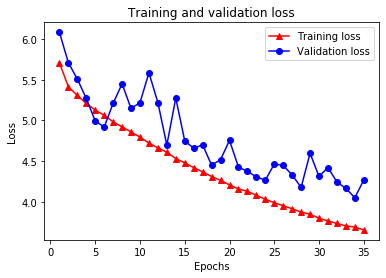

In [63]:
#check the loss of the model
history_dict = history.history
print(history_dict.keys())
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, '-r^', label='Training loss')
plt.plot(epochs, val_loss, '-bo', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.show()


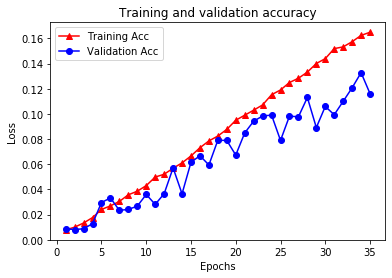

In [70]:
#check the accruacy of the model
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-r^', label='Training Acc')
plt.plot(epochs, val_acc, '-bo', label='Validation Acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.show()

In [54]:
#save the prediction Decoder as a csv file
import csv
#get the class indices and save as a CVS
labels = (train_data_generation.class_indices)
labels = dict((v,k) for k,v in labels.items())
#print(labels)

#save to CSV file
filename = "JJA_Cars_Model_prediction_decoder.csv"

try:
    with open(filename, 'w', newline="") as csvfile:
        writer = csv.writer(csvfile)
        for key, value in labels.items():
            writer.writerow([key,value])
except IOError:
    print("I/O error")

In [56]:
#testing of prediction decoder file

with open('JJA_Cars_Model_prediction_decoder.csv') as csv_file:
    reader = csv.reader(csv_file)

    mydict = dict(reader)
    
print(mydict)

{'0': '1', '1': '10', '2': '100', '3': '101', '4': '102', '5': '103', '6': '104', '7': '105', '8': '106', '9': '107', '10': '108', '11': '109', '12': '11', '13': '110', '14': '111', '15': '112', '16': '113', '17': '114', '18': '115', '19': '116', '20': '117', '21': '118', '22': '119', '23': '12', '24': '120', '25': '121', '26': '122', '27': '123', '28': '124', '29': '125', '30': '126', '31': '127', '32': '128', '33': '129', '34': '13', '35': '130', '36': '131', '37': '132', '38': '133', '39': '134', '40': '135', '41': '136', '42': '137', '43': '138', '44': '139', '45': '14', '46': '140', '47': '141', '48': '142', '49': '143', '50': '144', '51': '145', '52': '146', '53': '147', '54': '148', '55': '149', '56': '15', '57': '150', '58': '151', '59': '152', '60': '153', '61': '154', '62': '155', '63': '156', '64': '157', '65': '158', '66': '159', '67': '16', '68': '160', '69': '161', '70': '162', '71': '163', '72': '164', '73': '165', '74': '166', '75': '167', '76': '168', '77': '169', '78'

In [62]:
#save the model
model.save('JJA_CarRec_v1.h5')


In [69]:
#sample Prediciton using files provided (this is a testing grounds for the Webservice)
test_image_path = os.path.join(os.getcwd() + "\\spyker-c8-aileron-front.jpg")
#print(test_image_path)

#get image, convert to a tensor, and normalize data
test_image = np.asarray(Image.open(test_image_path))
test_image = test_image/255.0

#resize image 
test_image = tf.image.resize_with_pad(test_image, target_height = 200, target_width = 200)

#resize array
test_image_list = np.array([test_image])

#load model
Car_model = tf.keras.models.load_model('JJA_CarRec_v1.h5') #replace model.h5

#make the prediction
Model_prediction = Car_model.predict(test_image_list, batch_size = 1)

#convert output of model prediction and find the highest probility ouf ot all classes
Model_prediction_value = np.where(Model_prediction[0] == np.amax(Model_prediction[0]))
Model_prediction_value = Model_prediction_value[0]
#print("Model_prediction_value")
#print(Model_prediction_value)

#show the prediction array
#print("testing model prediction:", + Model_prediction_value)

#decompile the prediction and convert to int
prepared_prediciton = Model_prediction_value.item(0) #add 1 becuse prediction array starts at 0 where our decoder starts at 1
#prepared_prediciton = int(prepared_prediciton)
#print("prepared_prediciton")
#print(prepared_prediciton)

#Open decoded CSV file
with open('JJA_Cars_Model_prediction_decoder.csv') as csv_file:
    reader = csv.reader(csv_file)
    labels = dict(reader)

Predicted_car = labels.get(str(prepared_prediciton))
Predicted_car = int(Predicted_car)
#print("Predicted_car")
#print(Predicted_car)

#Translations of predictions
#translation list path
meta_data_path_translation = os.path.join(os.getcwd() + "\devkit\cars_meta.mat")
#print(meta_data_path_translation)

#inspection of translation file
meta_data_translation = loadmat(meta_data_path_translation)
#print(type(meta_data_translation))
#print(meta_data_translation.keys())

#get the translation information
dat_temp = [[row.flat[0] for row in line] for line in meta_data_translation['class_names'][0]]
col_temp = ['class_names']
df_train_meta_translation = pd.DataFrame(dat_temp, columns = col_temp)
df_train_meta_translation.index = range(1,len(df_train_meta_translation)+1)

#inspection of new DF of translation
#print(df_train_meta_translation.shape)
#print(df_train_meta_translation[:10])

#convert translation dataframe to Dictionary 
Car_translation_Dict = pd.DataFrame.to_dict(df_train_meta_translation)
Car_translation_Dict = Car_translation_Dict['class_names']

#print(df_train_meta_Str)

#replace entries of Car DF _ class with dict entrys
#translated_Meta_data_list = prepared_prediciton.replace(Car_translation_Dict)
#print(Car_translation_Dict)
print("Your model and make is: " + str(Car_translation_Dict.get(Predicted_car)))

#print(translated_Meta_data_list)

Your model and make is: Dodge Challenger SRT8 2011
